<a href="https://colab.research.google.com/github/0xZee/Ai_ML_program_101/blob/main/Ai_Perceptron_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI 101 - Artificial Neuron Perceptron

Program to train and predict Toxic and Non-Toxic Plants (based on leafs mesures [X] (2 Dim Array/Features)

**Linear Neural Network** : input layer `(2 features [X])`, 0 hidden layers, 1 output layer `(True/False)`

*   input is `(X,y) `
*   init(X) : Initiate `W and b` parameters. -> `(X1.W1 + X2.W2) + b` to compare with y later
*   MODEL and TRAIN : Do in loop : 
1.   `Model_NN(X, W, b)` : the linear function and (A) activation fct
2.   `Cost(A, y)` : Cost/Loss Fct : compare A to output y
3.   `Gradient(A,X,y)` : calculate the Descend Gradients : `dW , db`
4.   `Update(W, b, dW, db)` : update the new `(W, b)` values with Gradients output







In [232]:
# Math, DataSets and Plot Librairies :
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# make blobs dataset Librairies :
from sklearn.datasets import make_blobs


In [233]:
# Generate Dots Array and plot
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)

print('X Array Dimension : ', X.shape)
print('y Array Dimension : ', y.shape)


X Array Dimension :  (100, 2)
y Array Dimension :  (100,)


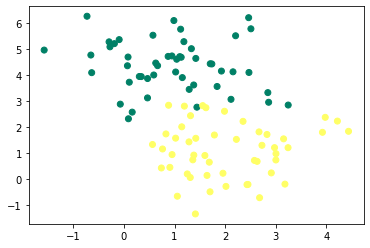

In [234]:
# Plot Dots
plt.scatter(X[:,0], X[:,1], c=y , cmap='summer')
plt.show()

In [235]:
# function initiation of neuron
# y is (X1.W1 + X2.W2) + b
# initiate a random W matrix (2 var/param) and b (the pad)


def init_neuron(X):
  W = np.random.randn(X.shape[1], 1)
  b = np.random.randn(1)
  return (W, b)

In [236]:
W, b = init_neuron(X)
print('W.shape = ',W.shape)
print('W = ',W)
print('b.shape = ',b.shape)
print('b = ',b)



W.shape =  (2, 1)
W =  [[0.18243517]
 [0.88003874]]
b.shape =  (1,)
b =  [0.9531368]


In [237]:
# def the model architecture : 
# the agregation (X1.W1 + X2.W2) + b -> Z
# the activation : pass it into sigmoide funtion 

def model(X, W, b):
  Z = X.dot(W) + b
  A = 1 / (1 + np.exp(-Z))
  return A

In [238]:
# test the model : 

A = model(X, W, b)
print('A.shape = ', A.shape)
print('A = ', A.dtype)


A.shape =  (100, 1)
A =  float64


In [239]:
# def the Log Loss function 
# compare A Activation and 
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

def log_loss(A, y):
    #Ll = - 1 / len(y) * np.sum(y * np.log(A) - (1 - y) * np.log(1 - A))
    #Ll = 1 / len(y) * np.sum((-y * np.log(A)) - ((1 - y) * np.log(1 - A)))
    Ll = 1 / (len(y) * np.sum((-y * np.log(A)) - ((1 - y) * np.log(1 - A))))
    #Ll = - 1 / len(y) * np.sum((y * np.log(A)) + ((1 - y) * np.log(1 - A)))
    return Ll 

In [240]:
# test Log Loss

Ll = log_loss(A, y)
print ('Ll is : ', Ll)

Ll is :  5.309096721620695e-07


In [241]:
# def the Descent Gradients function : Backward Propagation
# to updte W, b values (derivé dW et db)

def gradients(A, X, y):
  dW = 1 / len(y) * np.dot(X.T, A - y)
  db = 1 / len(y) * np.sum(A - y)
  return (dW, db)

In [242]:
dW, db = gradients(A, X, y)
print ('dW shape : ', dW.shape)
print ('db shape : ', db.shape)
print ('db is : ', db)
print ('dW, db : ', (dW, db))


dW shape :  (2, 100)
db shape :  ()
db is :  43.444316769867974
dW, db :  (array([[-0.11715571, -0.11715571,  1.37753228,  1.37753228, -0.11715571,
         1.37753228,  1.37753228, -0.11715571,  1.37753228, -0.11715571,
         1.37753228, -0.11715571,  1.37753228,  1.37753228, -0.11715571,
        -0.11715571, -0.11715571,  1.37753228, -0.11715571, -0.11715571,
         1.37753228,  1.37753228, -0.11715571,  1.37753228, -0.11715571,
         1.37753228, -0.11715571,  1.37753228,  1.37753228, -0.11715571,
        -0.11715571,  1.37753228, -0.11715571, -0.11715571, -0.11715571,
         1.37753228, -0.11715571, -0.11715571,  1.37753228, -0.11715571,
         1.37753228,  1.37753228,  1.37753228,  1.37753228, -0.11715571,
        -0.11715571, -0.11715571, -0.11715571,  1.37753228,  1.37753228,
        -0.11715571, -0.11715571,  1.37753228,  1.37753228,  1.37753228,
         1.37753228,  1.37753228, -0.11715571, -0.11715571, -0.11715571,
        -0.11715571,  1.37753228,  1.37753228, -0

In [243]:
# update W, b

def update(dW, db, W, b, learning_rate):
  W = W - learning_rate * dW
  b = b - learning_rate * db
  return (W, b)

In [244]:
# test update 

W, b = update(dW, db, W, b, 0.1)

print('W.shape = ',W.shape)
print('W = ',W)
print('b.shape = ',b.shape)
print('b = ',b)

W.shape =  (2, 100)
W =  [[0.19415074 0.19415074 0.04468194 0.04468194 0.19415074 0.04468194
  0.04468194 0.19415074 0.04468194 0.19415074 0.04468194 0.19415074
  0.04468194 0.04468194 0.19415074 0.19415074 0.19415074 0.04468194
  0.19415074 0.19415074 0.04468194 0.04468194 0.19415074 0.04468194
  0.19415074 0.04468194 0.19415074 0.04468194 0.04468194 0.19415074
  0.19415074 0.04468194 0.19415074 0.19415074 0.19415074 0.04468194
  0.19415074 0.19415074 0.04468194 0.19415074 0.04468194 0.04468194
  0.04468194 0.04468194 0.19415074 0.19415074 0.19415074 0.19415074
  0.04468194 0.04468194 0.19415074 0.19415074 0.04468194 0.04468194
  0.04468194 0.04468194 0.04468194 0.19415074 0.19415074 0.19415074
  0.19415074 0.04468194 0.04468194 0.19415074 0.04468194 0.19415074
  0.04468194 0.04468194 0.19415074 0.04468194 0.04468194 0.19415074
  0.19415074 0.04468194 0.04468194 0.04468194 0.19415074 0.19415074
  0.04468194 0.04468194 0.19415074 0.04468194 0.04468194 0.04468194
  0.04468194 0.04468194

In [245]:
# predict a result, True/False

def predict(X, W, b):
  A = model(X, W, b)
  return A > 0.5

In [246]:
from sklearn.metrics import accuracy_score

In [247]:
# def the trainnig model 
# loop into : Model() -> log_loss() -> gradients() -> update()
# learning rate is set to 0.1 (padding) and iterate for 100 n_cycles

def train_neuron(X, y, learning_rate = 0.1, n_cycles = 100):
  # init (W, b)
  W, b = init_neuron(X)
  # train model 
  Loss = []
  for i in range(n_cycles):
    A = model(X, W, b)
    Loss.append(log_loss(A, y))
    dW, db = gradients(A, X, y)
    W, b = update(dW, db, W, b, learning_rate)

  # y_pred, based on predict(), boolean
  y_pred = predict(X, W, b)
  # compare y and y_pred, to get the performance of the model
  #print('Acc. Score : ', accuracy_score(y, y_pred))
  print('-- the predict is: ', y_pred)

  plt.plot(Loss)
  print('-- the Loss is: ', Loss)

  plt.show()

  return (W, b)



-- the predict is:  [[ True  True False ...  True False  True]
 [ True  True False ...  True False  True]
 [ True  True False ...  True False  True]
 ...
 [ True  True False ...  True False  True]
 [ True  True False ...  True False  True]
 [ True  True False ...  True False  True]]
-- the Loss is:  [5.857762347359437e-07, 1.1646495718259939e-06, 1.5660549604770678e-06, 2.0329949574629265e-06, 2.6223584561098133e-06, 3.1543516087033724e-06, 3.620618616884059e-06, 4.023074940118591e-06, 4.401907641750245e-06, 4.770093047828662e-06, 5.130547042666536e-06, 5.483777680596253e-06, 5.830027976312681e-06, 6.169541548865175e-06, 6.502572216491719e-06, 6.829380124796202e-06, 7.150227238241849e-06, 7.465373502751413e-06, 7.775073781653727e-06, 8.07957555391037e-06, 8.379117289912346e-06, 8.673927392935136e-06, 8.964223592452112e-06, 9.250212686069378e-06, 9.532090542253045e-06, 9.810042292156193e-06, 1.0084242653716199e-05, 1.0354856343984726e-05, 1.0622038546211297e-05, 1.0885935406675955e-05, 

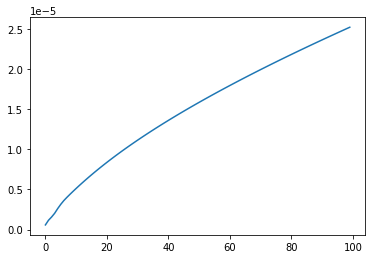

(array([[ 2.14975811,  2.14975811, -0.41061546, -0.41061546,  2.14975811,
         -0.41061546, -0.41061546,  2.14975811, -0.41061546,  2.14975811,
         -0.41061546,  2.14975811, -0.41061546, -0.41061546,  2.14975811,
          2.14975811,  2.14975811, -0.41061546,  2.14975811,  2.14975811,
         -0.41061546, -0.41061546,  2.14975811, -0.41061546,  2.14975811,
         -0.41061546,  2.14975811, -0.41061546, -0.41061546,  2.14975811,
          2.14975811, -0.41061546,  2.14975811,  2.14975811,  2.14975811,
         -0.41061546,  2.14975811,  2.14975811, -0.41061546,  2.14975811,
         -0.41061546, -0.41061546, -0.41061546, -0.41061546,  2.14975811,
          2.14975811,  2.14975811,  2.14975811, -0.41061546, -0.41061546,
          2.14975811,  2.14975811, -0.41061546, -0.41061546, -0.41061546,
         -0.41061546, -0.41061546,  2.14975811,  2.14975811,  2.14975811,
          2.14975811, -0.41061546, -0.41061546,  2.14975811, -0.41061546,
          2.14975811, -0.41061546, -0.

In [248]:
# train model and plot loss curb

train_neuron(X, y)

new_plant : [2 5]
Prediction : TOXIC =  [ True  True False False  True False False  True False  True False  True
 False False  True  True  True False  True  True False False  True False
  True False  True False False  True  True False  True  True  True False
  True  True False  True False False False False  True  True  True  True
 False False  True  True False False False False False  True  True  True
  True False False  True False  True False False  True False False  True
  True False False False  True  True False False  True False False False
 False False  True False  True  True  True  True  True  True False False
  True  True False  True]


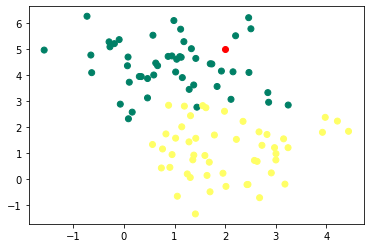

In [259]:
# test the model
# Predict if nen_plant is TOXIC or not

new_plant = np.array([2, 5])
pred = predict(new_plant, W, b)

plt.scatter(X[:,0], X[:,1], c=y , cmap='summer')
plt.scatter(new_plant[0], new_plant[1], c='r')
print('new_plant :' , new_plant)
print('Prediction : TOXIC = ' , pred)

plt.show()
